# Project: Investigate a Dataset (TMDb Movie Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

For this project, I decided to analyse the TMDb movie data set provide by Kaggle. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. For this data set, I will answer some interesting questions :


<li> <a>What is the best runtime for a movie ?</a> </li>
<li> <a>Which genre has the most movies ?</a> </li>
<li> <a>Which genres are most popular?</a> </li>
<li> <a>Which genre has the longest  average runtime ?</a> </li>
<li> <a>Which genre has the longest average vote count ?</a> </li>
<li> <a>Which genre has highest average budget ? </a></li>
<li> <a>Which genre has highest average revenue ?</a> </li>
<li> <a>Which genre has highest average profit ? </a> </li>
<li> <a>Which release year has the highest revenue and budget ?</a> </li>
<li> <a>Which release year has the highest average Profit? </a> </li>
<li> <a>Which release year has the highest average Popularity ?</a> </li>
<li> <a>Which release year has the highest average vote count ? </a> </li>
<li> <a> What kinds of properties are associated with movies that have high revenues? </a> </li>
<li> <a> Which genres are most popular from year to year?  </a> </li>

<a id='wrangling'></a>
## Data Wrangling

> In this section, I will start to acessed,cleaned and trimmed the dataset in order to understand which columns are more crucial to answer some interesting questions below

### General Properties

In [88]:
# import all packages for this project 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [89]:
# Load and view first few lines of dataset
df=pd.read_csv("tmdb-movies.csv")
df.head(2)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [90]:
#print Last two rows of the dataset
df.tail(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [91]:
# this displays a concise summary of the dataframe,
# including the number of non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [92]:
# print number of duplulicate data set
df.duplicated().sum()


1

In [93]:
# drop duplicated dataset because the data is double
df.drop_duplicates(inplace=True)

In [94]:
# check number of duplicates rows
df.duplicated().any()

False

In [95]:
# number of missing values for each columns
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [96]:
# drop rows with any null values in the datasets because we are dealing with large data sets 
# and less number of records has missing values.
df.dropna(inplace=True)

# confirme changes and checks if any of columns in dataset have null values
df.isna().sum().any()


False

In [97]:
#drop colums that aren't relevant to our questions.
Columns=["id",'imdb_id','cast', 'director', 'tagline', 'keywords', 'overview','original_title'
         ,'homepage','release_date',"production_companies"]

#drop columns from movies dataset
df.drop(Columns,axis=1,inplace=True)



In [98]:
# change data type :# convert from int to float 
columns=["budget","revenue"]
for c in columns :
    df[c]=df[c].astype("float64")
    
# confirm changes    
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 10819
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    1992 non-null   float64
 1   budget        1992 non-null   float64
 2   revenue       1992 non-null   float64
 3   runtime       1992 non-null   int64  
 4   genres        1992 non-null   object 
 5   vote_count    1992 non-null   int64  
 6   vote_average  1992 non-null   float64
 7   release_year  1992 non-null   int64  
 8   budget_adj    1992 non-null   float64
 9   revenue_adj   1992 non-null   float64
dtypes: float64(6), int64(3), object(1)
memory usage: 171.2+ KB


In [99]:
# create copy dataframe contains pipe (|)characters
hb1=df[df["genres"].str.contains("|")]

#columns genres contain multiple values separated by pipe (|)characters.
#This characters is odd in the column genres. 

b=[]
for i in range (len(hb1.index)):
    a=hb1.genres.apply(lambda x : x.split("|"))
    a=len(a.iloc[i])
    b.append(a)
    
max(b)  

5

In [100]:
 def hb(x):
    """ function below used to have a even list in the column genres, """
    
    hb1[x]=hb1[x].apply(lambda t: t.split("|"))
    for i in range(len(hb1.index)):
        if len(hb1[x].iloc[i])==5:
            pass
        
        elif len(hb1[x].iloc[i])==4:
            hb1[x].iloc[i].extend("A")
            
        elif len(hb1[x].iloc[i])==3:
            hb1[x].iloc[i].extend("A"*2)
        
        elif len(hb1[x].iloc[i])==2:
            hb1[x].iloc[i].extend("A"*3)
    
        elif len(hb1[x].iloc[i])==1:
            hb1[x].iloc[i].extend("A"*4)
          
            
hb("genres") 
hb1.head()

,popularity,budget,revenue,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000.0,1.513529e+09,124,"[Action, Adventure, Science Fiction, Thriller, A]",5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000.0,3.784364e+08,120,"[Action, Adventure, Science Fiction, Thriller, A]",6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000.0,2.952382e+08,119,"[Adventure, Science Fiction, Thriller, A, A]",2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000.0,2.068178e+09,136,"[Action, Adventure, Science Fiction, Fantasy, A]",5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000.0,1.506249e+09,137,"[Action, Crime, Thriller, A, A]",2947,7.3,2015,1.747999e+08,1.385749e+09


In [101]:
# create five copies of the dataframe hb1
df0=hb1.copy() 
df1=hb1.copy() 
df2=hb1.copy() 
df3=hb1.copy() 
df4=hb1.copy() 

In [102]:
# choose one element in the list by using apply function to genres column  of each dataframe copy
df0["genres"]=df0["genres"].apply(lambda x: x[0])
df1["genres"]=df1["genres"].apply(lambda x: x[1])
df2["genres"]=df2["genres"].apply(lambda x: x[2])
df3["genres"]=df3["genres"].apply(lambda x: x[3])
df4["genres"]=df4["genres"].apply(lambda x: x[4])

# After remove pipe (|)characters, each copy data should look like this
df0.head()

,popularity,budget,revenue,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000.0,1.513529e+09,124,Action,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000.0,3.784364e+08,120,Action,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000.0,2.952382e+08,119,Adventure,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000.0,2.068178e+09,136,Action,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000.0,1.506249e+09,137,Action,2947,7.3,2015,1.747999e+08,1.385749e+09


In [103]:
# combine dataframes to add to the original dataframe
new_rows = df0.append([df1,df2,df3,df4])
new_rows.head(3)

,popularity,budget,revenue,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000.0,1.513529e+09,124,Action,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000.0,3.784364e+08,120,Action,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000.0,2.952382e+08,119,Adventure,2480,6.3,2015,1.012000e+08,2.716190e+08


In [104]:
# drop the original hb1 rows
df.drop(hb1.index, inplace=True)

# add in our newly separated rows
df = df.append(new_rows, ignore_index=True)


In [105]:
# We need to remove all genres contains 'A'
hbA=df[df['genres']=='A']
df.drop(hbA.index, inplace=True)
# confirm change
df[df['genres']=='A'].any()

popularity      False
budget          False
revenue         False
runtime         False
genres          False
vote_count      False
vote_average    False
release_year    False
budget_adj      False
revenue_adj     False
dtype: bool

In [106]:
# confirm change
df.head()

,popularity,budget,revenue,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000.0,1.513529e+09,124,Action,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000.0,3.784364e+08,120,Action,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000.0,2.952382e+08,119,Adventure,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000.0,2.068178e+09,136,Action,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000.0,1.506249e+09,137,Action,2947,7.3,2015,1.747999e+08,1.385749e+09


In [107]:
# confirm change
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5123 entries, 0 to 9931
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    5123 non-null   float64
 1   budget        5123 non-null   float64
 2   revenue       5123 non-null   float64
 3   runtime       5123 non-null   int64  
 4   genres        5123 non-null   object 
 5   vote_count    5123 non-null   int64  
 6   vote_average  5123 non-null   float64
 7   release_year  5123 non-null   int64  
 8   budget_adj    5123 non-null   float64
 9   revenue_adj   5123 non-null   float64
dtypes: float64(6), int64(3), object(1)
memory usage: 440.3+ KB


In [108]:
# Number of duplicated rows
df.duplicated().sum()


0

In [109]:
# drop duplicated dataset
df.drop_duplicates(inplace=True)


In [110]:
# check number of duplicates rows
df.duplicated().any()

False

In [111]:
#number of null values for each columns
df.isna().sum()

popularity      0
budget          0
revenue         0
runtime         0
genres          0
vote_count      0
vote_average    0
release_year    0
budget_adj      0
revenue_adj     0
dtype: int64

In [112]:
# profit unaccounting for inflation over time
df["profit"]=df["revenue"]-df["budget"]
# profit accounting for inflation over time
df["profit_adj"]=df["revenue_adj"]-df["budget_adj"]

In [113]:
# descriptive statistics
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profit_adj
count,5123.000000,5.123000e+03,5.123000e+03,5123.000000,5123.000000,5123.000000,5123.000000,5.123000e+03,5.123000e+03,5.123000e+03,5.123000e+03
mean,1.466109,4.084584e+07,1.352195e+08,106.454031,740.526059,6.176635,2007.504002,4.285440e+07,1.524784e+08,9.437363e+07,1.096240e+08
std,2.092849,5.535222e+07,2.438112e+08,30.644126,1192.315220,0.875382,7.789508,5.581630e+07,2.806311e+08,2.068871e+08,2.477683e+08
min,0.000620,0.000000e+00,0.000000e+00,0.000000,10.000000,2.100000,1961.000000,0.000000e+00,0.000000e+00,-4.139124e+08,-4.139124e+08
25%,0.423160,7.500000e+01,0.000000e+00,93.000000,61.500000,5.700000,2006.000000,8.243377e+01,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.847636,1.900000e+07,3.323126e+07,102.000000,255.000000,6.200000,2009.000000,2.032801e+07,3.564366e+07,7.792502e+06,9.145512e+06
75%,1.752987,6.000000e+07,1.555453e+08,116.000000,835.500000,6.800000,2012.000000,6.310011e+07,1.735719e+08,1.011190e+08,1.080976e+08
max,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.300000,2015.000000,4.250000e+08,2.827124e+09,2.544506e+09,2.750137e+09


<a id='eda'></a>
## Exploratory Data Analysis



## <li>Univariate Exploration</li>

#### 1- What is the best runtime for a movie ?

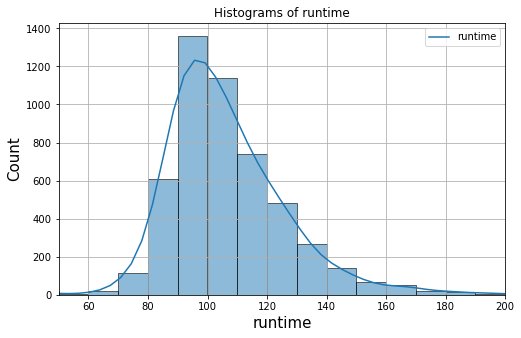

In [114]:
plt.figure(figsize=(8,5))
bins=np.arange(df.runtime.min(),df.runtime.max()+10,10)
sb.histplot(data=df,x='runtime',kde=True,bins=bins)
plt.title('Histograms of runtime')
plt.ylabel("Count",size=15)
plt.xlabel("runtime",size=15)
plt.grid(True)
plt.legend(labels=['runtime'])
plt.xlim([50,200]);

#### Observation 1 : 
> The distribution of runtime is normal (unimodal and symetric). The best runtime for a movie is around 100 min

####  2- Which genre has the most movies?

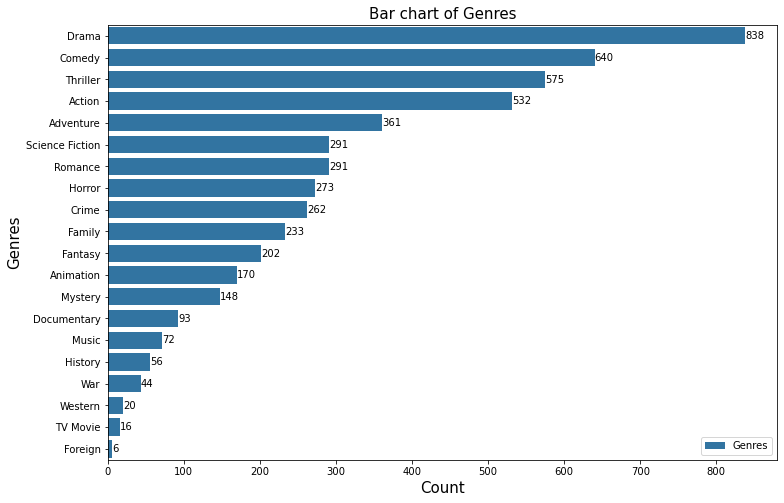

In [115]:
plt.figure(figsize=(12,8))
base_color=sb.color_palette()[0]
Freq_genres=df.genres.value_counts().index

sb.countplot(data=df,y='genres',color=base_color,order=Freq_genres)
plt.title('Bar chart of Genres',size=15)
plt.ylabel("Genres",size=15)
plt.xlabel("Count",size=15)
plt.legend(labels=['Genres'],loc=4)
for i in range(df.genres.value_counts().shape[0]):
    count=df.genres.value_counts().values[i]
    s= f'{count}'
    plt.text(count,i, s, va='center', color='black')

#### Obesrvation 2 : 
>  The Drama genre has the most movies than others genres

## <li>Bivariate Exploration</li>

#### 3- Which genres are most popular

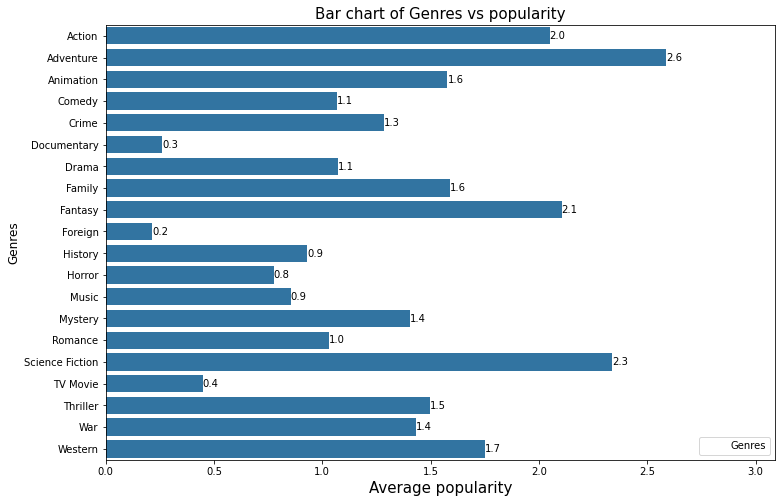

In [135]:
plt.figure(figsize=(12,8))
genre_order=df.groupby("genres").mean()['popularity'].index


sb.barplot(data=df,y='genres',x='popularity',color=base_color,errwidth=0,order=genre_order)
plt.xlabel('Average popularity',size=15)
plt.ylabel('Genres',size=12)
plt.title('Bar chart of Genres vs popularity',size=15)
plt.legend(labels=['Genres'],loc=4)

for i in range(df.groupby("genres").mean()["popularity"].shape[0]):
    count=df.groupby("genres").mean()["popularity"].values[i]
    s= f'{count:.1f}'
    plt.text(count,i, s, va='center', color='black')  

#### Obesrvation 3 : 
>  The Adventure genre is most popular than others genres

#### 4-Which genre has the longest  average runtime ?

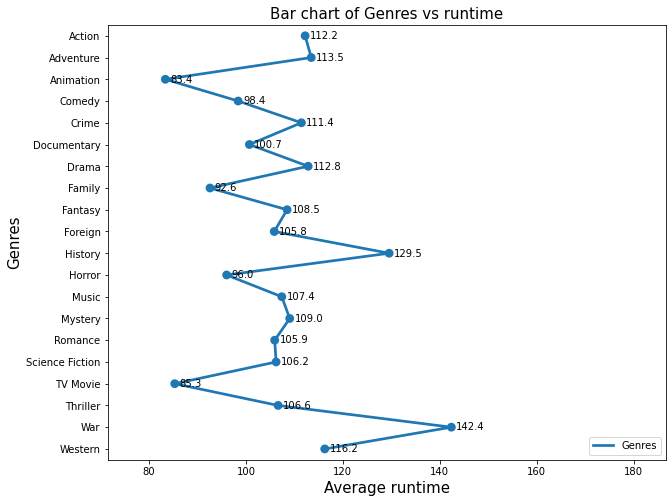

In [133]:
plt.figure(figsize=(10,8))
genre_order=df.groupby("genres").mean()['runtime'].index

sb.pointplot(data=df,y='genres',x='runtime',color=base_color,errwidth=0,order=genre_order)
plt.xlabel('Average runtime',size=15)
plt.ylabel('Genres',size=15)
plt.title("Bar chart of Genres vs runtime",size=15)
plt.legend(labels=['Genres'],loc=4)

for i in range(df.groupby("genres").mean()["runtime"].shape[0]):
    count=df.groupby("genres").mean()["runtime"].values[i]
    s= f'{count:.1f}'
    plt.text(count+1,i, s, va='center', color='black')

#### Obesrvation 4 : 
>  The war genre has the longest average runtime than others genres

#### 5-Which genre has the longest average vote count ?

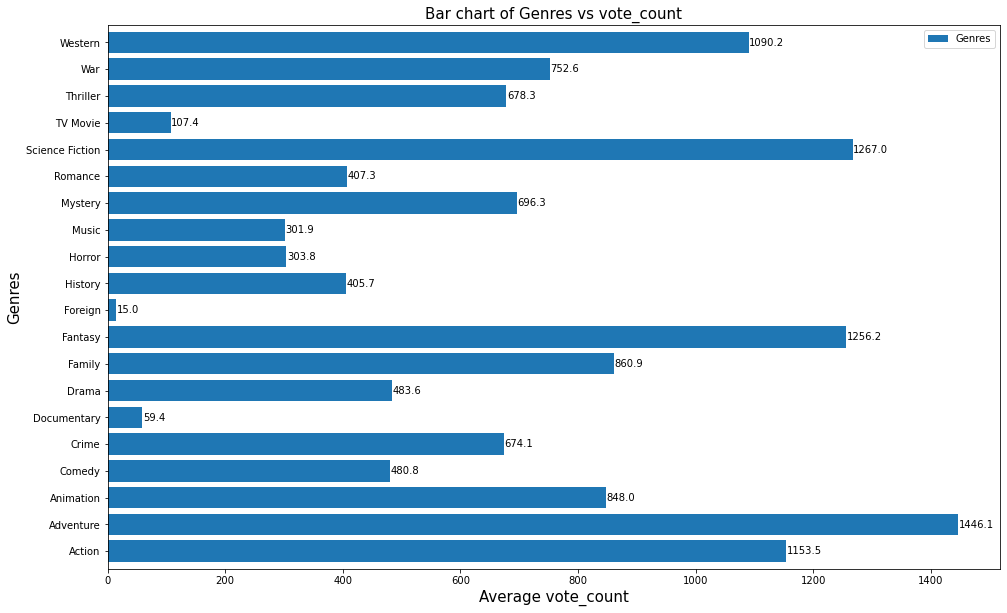

In [158]:
plt.figure(figsize=(16,10))
genre_order=df.groupby("genres").mean()['vote_count'].plot(kind='barh',width=0.8)
plt.xlabel('Average vote_count',size=15)
plt.ylabel('Genres',size=15)
plt.title("Bar chart of Genres vs vote_count",size=15)
plt.legend(labels=['Genres'],loc=1)


for i in range(df.groupby("genres").mean()["vote_count"].shape[0]):
    count=df.groupby("genres").mean()["vote_count"].values[i]
    s= f'{count:.1f}'
    plt.text(count+1,i, s, va='center', color='black')

#### Obesrvation 5 : 
>  The Adventure genre has the longest vote count than others genres. This mean that the Adventure genre is more popular

#### 6- Which genre has highest average budget ?

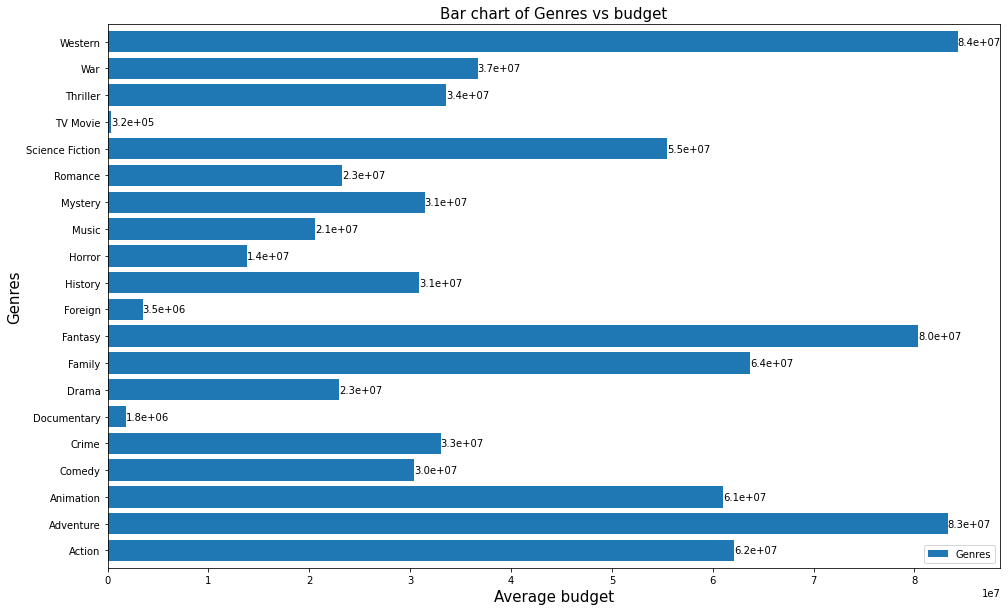

In [159]:
plt.figure(figsize=(16,10))
genre_order=df.groupby("genres").mean()['budget'].plot(kind='barh',width=0.8)
plt.xlabel('Average budget',size=15)
plt.ylabel('Genres',size=15)
plt.title("Bar chart of Genres vs budget",size=15)
plt.legend(labels=['Genres'],loc=4)

for i in range(df.groupby("genres").mean()["budget"].shape[0]):
    count=df.groupby("genres").mean()["budget"].values[i]
    s= f'{count:.1e}'
    plt.text(count+1,i, s, va='center', color='black')

#### Observation 6
>The western, Fantasy and Adventure genres have highest average budget, followed by Action,Animation and Familly genres

#### 7- Which genre has highest average revenue ?

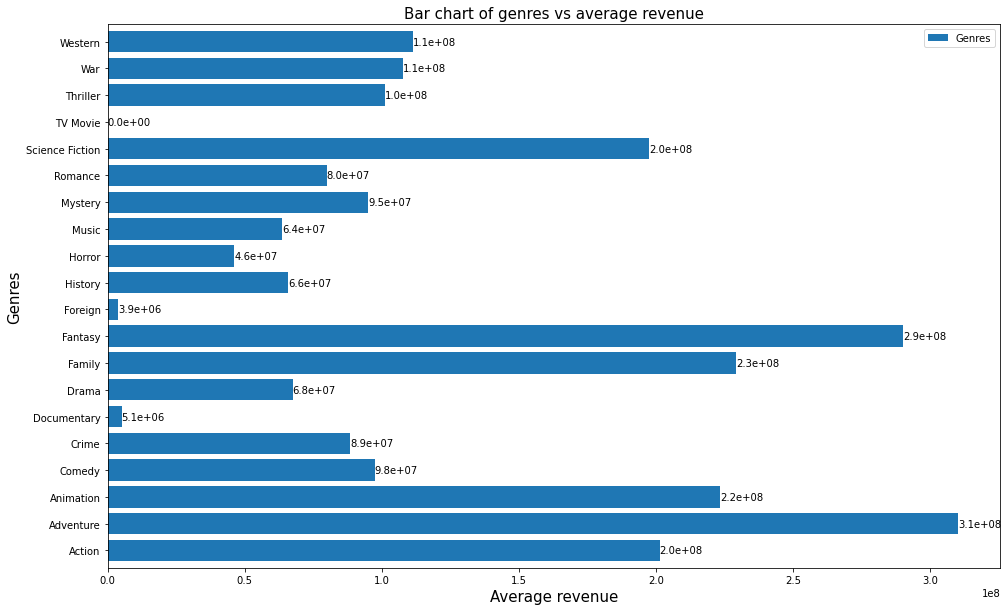

In [160]:
plt.figure(figsize=(16,10))
genre_order=df.groupby("genres").mean()['budget'].index
genre_order=df.groupby("genres").mean()['revenue'].plot(kind='barh',width=0.8)
plt.xlabel('Average revenue',size=15)
plt.ylabel('Genres',size=15)
plt.title("Bar chart of genres vs average revenue",size=15);
plt.legend(["Genres"])
for i in range(df.groupby("genres").mean()["revenue"].shape[0]):
    count=df.groupby("genres").mean()["revenue"].values[i]
    s= f'{count:.1e}'
    plt.text(count+1,i, s, va='center', color='black')

#### Observation 7
>The Adventure genre has highest average revenue, followed by Fantasy genre

#### 8- Which genre has highest average profit ?

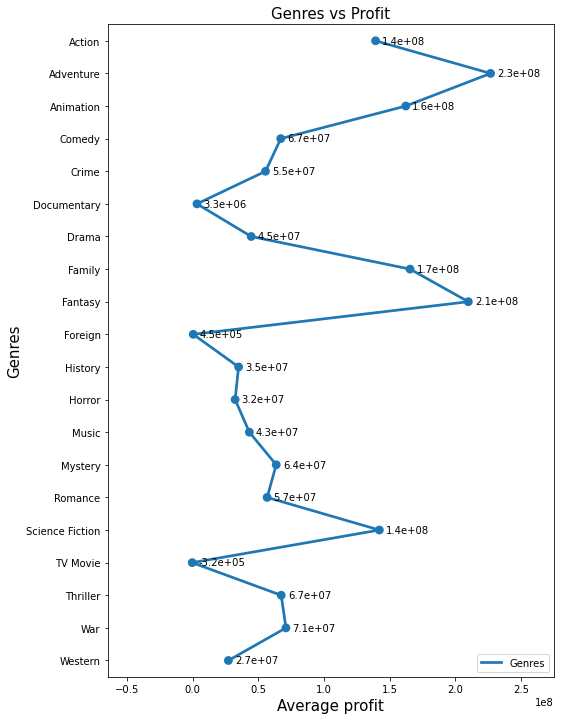

In [136]:
plt.figure(figsize=(8,12))
genre_order=df.groupby("genres").mean()['profit'].index

sb.pointplot(data=df,y='genres',x='profit',errwidth=0,color=base_color,order=genre_order)
plt.xlabel('Average profit',size=15)
plt.ylabel('Genres',size=15)
plt.title("Genres vs Profit",size=15)
plt.legend(labels=['Genres'],loc=4)
for i in range(df.groupby("genres").mean()["profit"].shape[0]):
    count=df.groupby("genres").mean()["profit"].values[i]
    s= f'{count:.1e}'
    plt.text(count+5000000,i, s, va='center', color='black')

#### Observation 7
>The Adventure,Fantasy genre has highest average profit,followed by Familly and animation genre

#### 8-Which release year has the highest revenue and budget ?

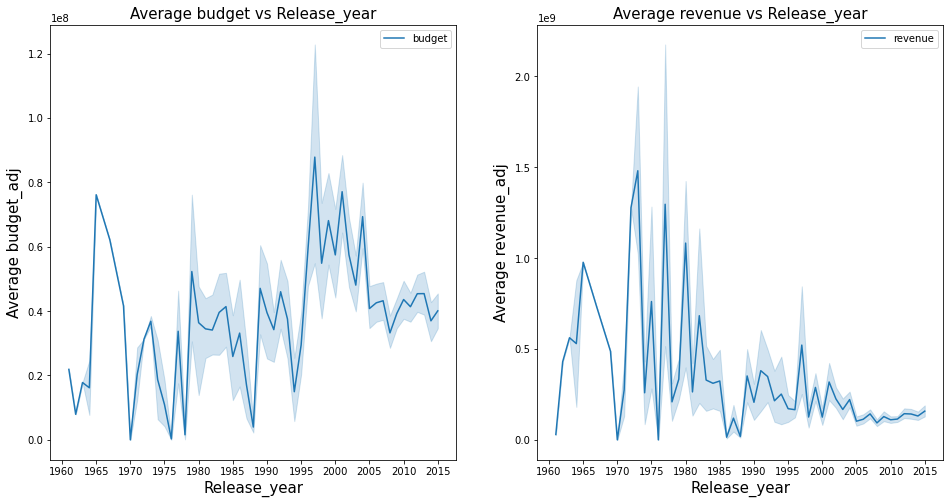

In [122]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sb.lineplot(data=df,x='release_year',y='budget_adj')
plt.xlabel("Release_year",size=15)
plt.ylabel("Average budget_adj",size=15)
plt.xticks(np.arange(1960,2016,5))
plt.title("Average budget vs Release_year",size=15)
plt.legend(['budget']);


plt.subplot(1,2,2)
sb.lineplot(data=df,x='release_year',y='revenue_adj')
plt.xlabel("Release_year",size=15)
plt.ylabel("Average revenue_adj",size=15)
plt.xticks(np.arange(1960,2016,5))
plt.title("Average revenue vs Release_year",size=15)
plt.legend(['revenue']);



We can see that, average budget and average revenue vary over year. But, according to the plot year 1996 he most highest budget and the year 1972 he most highest revenue. The revenue was very low between the years 1985 and 2015 
is 1995-2005 and the highest average revenue 1972-1974

#### 9-Which release year has the highest average Profit?

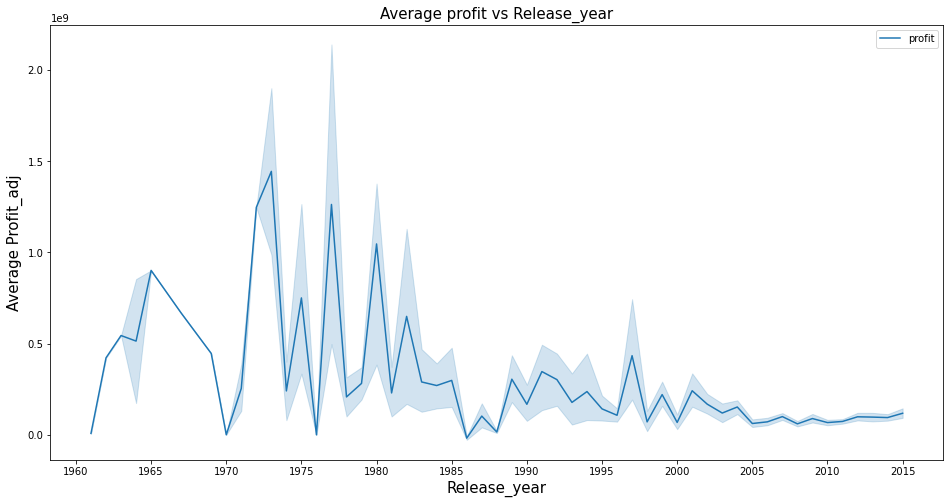

In [123]:
plt.figure(figsize=(16,8))
sb.lineplot(data=df,x='release_year',y='profit_adj')
plt.xlabel("Release_year",size=15)
plt.ylabel("Average Profit_adj",size=15)
plt.xticks(np.arange(1960,2016,5))
plt.title("Average profit vs Release_year",size=15)
plt.legend(['profit']);


#### Observation 8 : 
> We can see that, average profit vary over year. But, year 1973 he most profitable years and the profit was very low between the years 1985 and 2015

#### 9-Which release year has the highest average Popularity ?

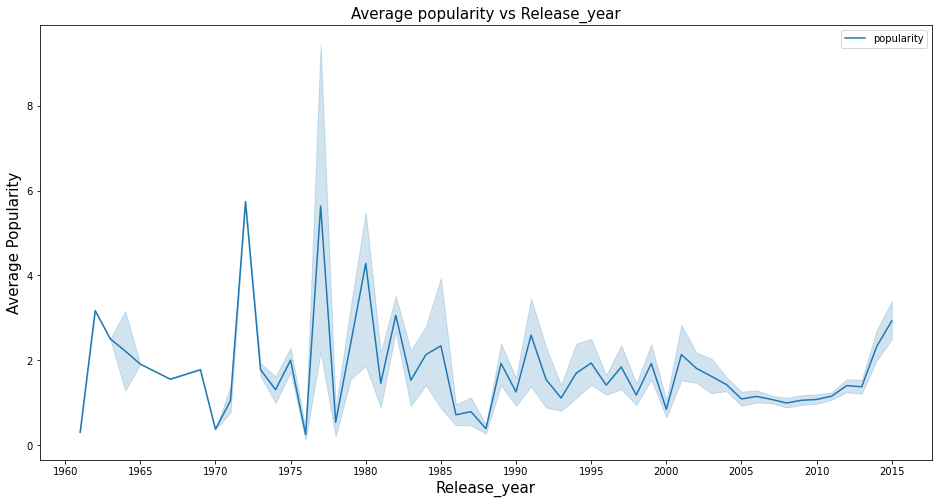

In [124]:
plt.figure(figsize=(16,8))
sb.lineplot(data=df,x='release_year',y='popularity')
plt.xlabel("Release_year",size=15)
plt.ylabel("Average Popularity",size=15)
plt.xticks(np.arange(1960,2016,5))
plt.title("Average popularity vs Release_year",size=15)
plt.legend(['popularity'])

#### Observation 9 : 
> We can see that, average popularity vary over year. But, year 1973 he most popularity year and the popularity was very low between the years 1985 and 2015

#### 10-Which release year has the highest average vote count ?

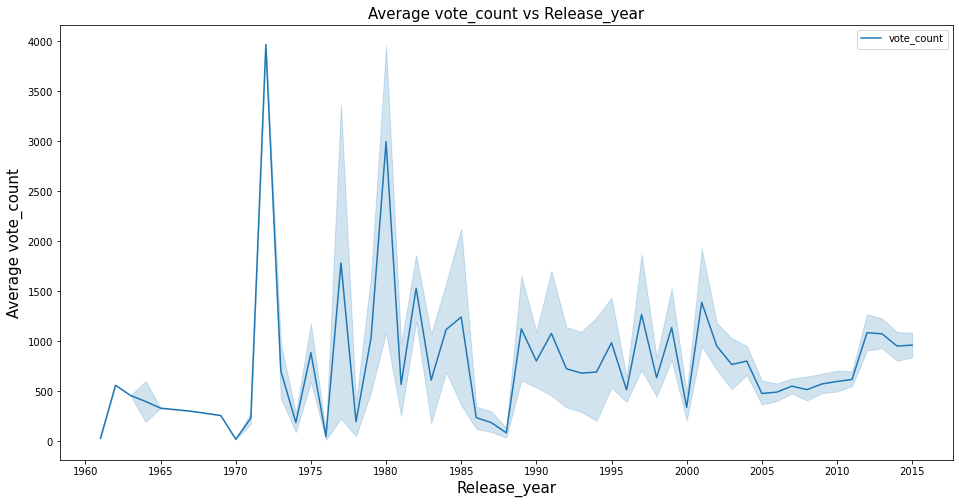

In [125]:
plt.figure(figsize=(16,8))
sb.lineplot(data=df,x='release_year',y='vote_count')
plt.xlabel("Release_year",size=15)
plt.ylabel("Average vote_count",size=15)
plt.xticks(np.arange(1960,2016,5));
plt.title("Average vote_count vs Release_year",size=15)
plt.legend(['vote_count']);

#### Observation 9 : 
> We can see that, average vote count vary over year. But, year 1973 he most vote count year and the vote count was very low between the years 1985 and 2015

#### 10- What kinds of properties are associated with movies that have high revenues?

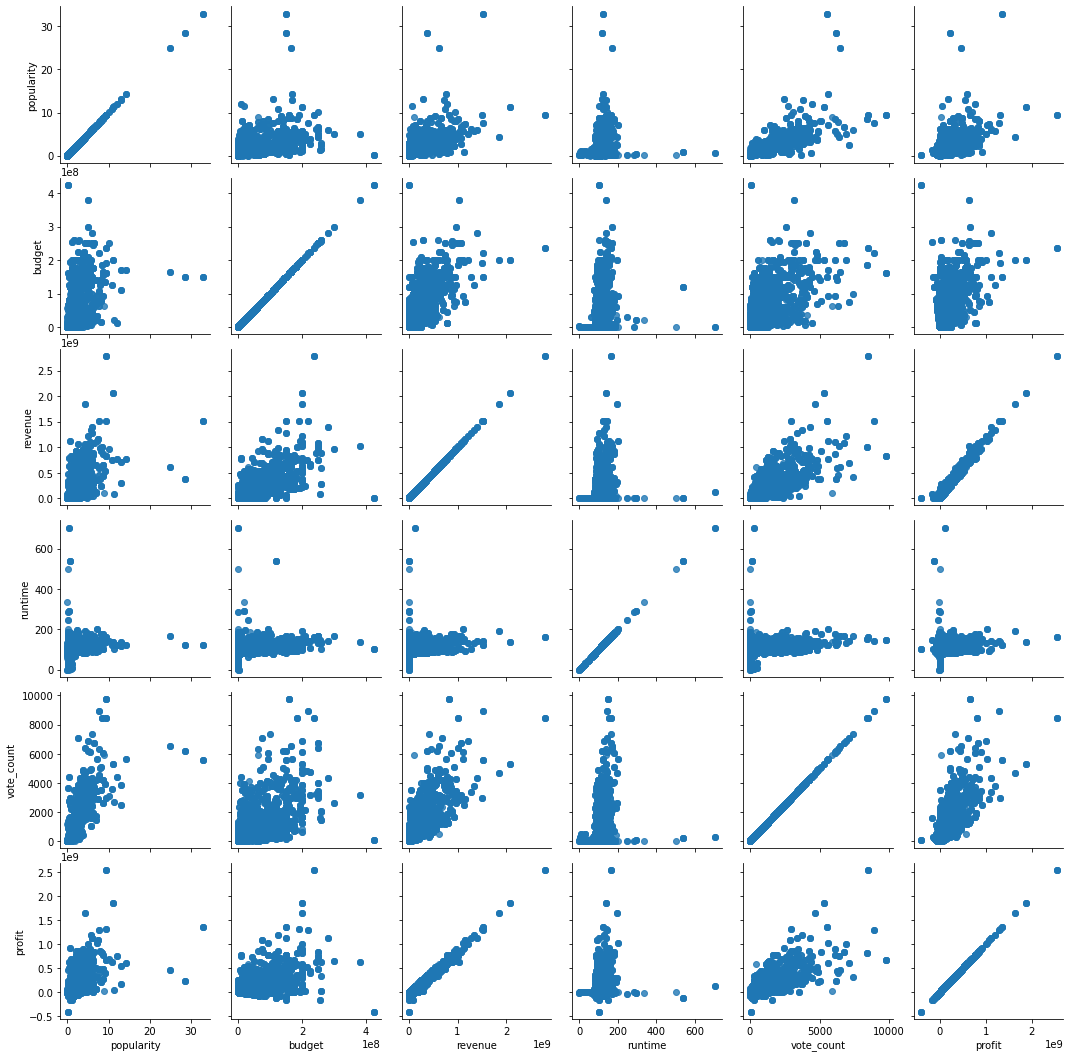

In [126]:
# Plot scatter matrices
g=sb.PairGrid(data=df,vars=['popularity', 'budget', 'revenue', 'runtime', 'vote_count' , 'profit'])
g.map(sb.regplot, fit_reg=False)

In [127]:
# create the standard errors dataframe
A=np.r_[0:4,5,10]
# repeat the step above using index numbers
df_select = df.iloc[:,A]
# confirme selection
df_select.head()

,popularity,budget,revenue,runtime,vote_count,profit
0,32.985763,150000000.0,1.513529e+09,124,5562,1.363529e+09
1,28.419936,150000000.0,3.784364e+08,120,6185,2.284364e+08
2,13.112507,110000000.0,2.952382e+08,119,2480,1.852382e+08
3,11.173104,200000000.0,2.068178e+09,136,5292,1.868178e+09
4,9.335014,190000000.0,1.506249e+09,137,2947,1.316249e+09


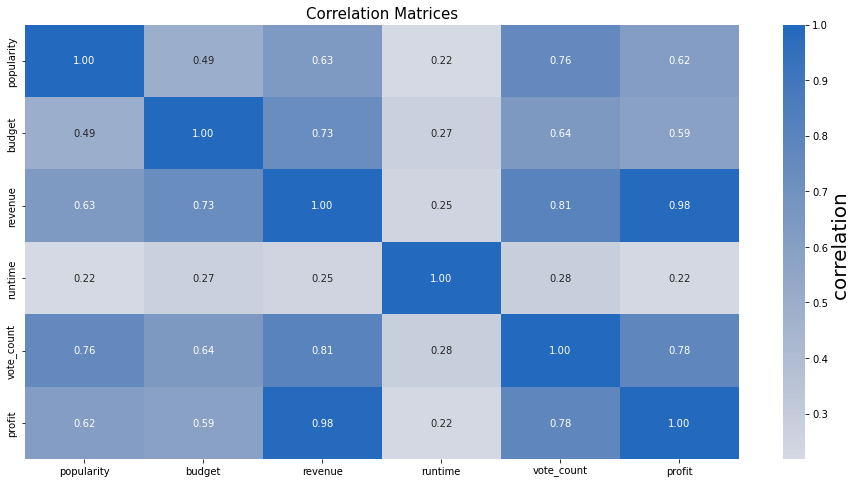

In [128]:
# Plot correlation matrices
plt.figure(figsize=(16,8))
ax=sb.heatmap(df_select.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r',center = 0,
              cbar_kws={'label': 'correlation '})
ax.figure.axes[-1].yaxis.label.set_size(20)
plt.title("Correlation Matrices",size=15);

#### Observation 10 : 
> We can see that the profit is positve highly related to the popularity, budget, revenue, and vote count because, the
correlation coefficient is very high. However, runtime is not highly related to the popularity, budget, revenue, and vote count because, the correlation coefficient is very low. 

## <li> Multivariate Exploration</li>

#### 11-Which genres are most popular from year to year?       

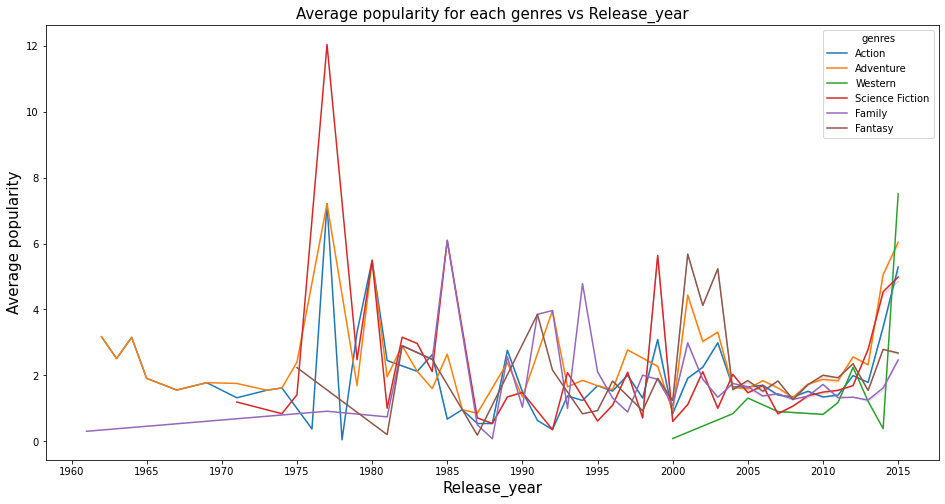

In [129]:
# due to high nnumber of genres, I was choosen to answer this question by selecting 6 genres
df_6=df[df.genres.isin(['Action', 'Adventure', 'Western', 'Science Fiction','Family', 'Fantasy'])]

plt.figure(figsize=(16,8))
sb.lineplot(data=df_6,x='release_year',y='popularity',hue="genres",ci=0)
plt.xlabel("Release_year",size=15)
plt.ylabel("Average popularity",size=15)
plt.xticks(np.arange(1960,2016,5));
plt.title("Average popularity for each genres vs Release_year",size=15);


##### Observation 11 
> We can see that year 1978, science fiction is most popular than other genres and the popularity was similar between year 2005 and 2015

#### Conclusions

Firstly, if we are not take year in account we can conclude that :
    
<li> The best runtime for a movie is around 100 min </li>
<li> The Drama genre has the most movies than others genres </li>
<li> The war genre has the longest average runtime than others genres </li>
<li> This mean that the Adventure genre is more popular </li>
<li> The western,Fantasy and Adventure genres have highest average budget,followed by Action,Animation and Familly genres </li>
<li> The Adventure genre has highest average revenue, followed by Fantasy genre </li>
<li> The Adventure,Fantasy genre has highest average profit,followed by Familly and animation genre </li>

Secondly, If we are take year in compte we can conclude that :

<li> Average Budget, average popularity, average revenue, average vote count and average profit vary over year and it characteristics was very low from 1985 and 2015 </li>

<li> The profit is highly related to the popularity, budget, revenue, and vote count </li>

<li> The runtime isn't highly related to the popularity, budget, revenue, and vote count </li>

### Limitations

<li> The gbobal analyse show that the profit was very low when year grown. In reality, it'is difficult to predicit the behaviour on profit over the year because, the profit vary over year. But, deep analyse on correlation is the way where the company can focus efforts to make more profit over the year </li>